In [30]:
import re
import pandas as pd
from os import path
from collections import Counter
from glob import glob
from lxml import etree
from tqdm import tqdm

In [31]:
def canon(path_corpus):
    with open(path_corpus, encoding="utf8") as file:
        tree = etree.parse(file)
        if tree.find(".//profileDesc") is not None:
            profil = tree.find(".//profileDesc")
            if profil.get("tag") == "canon":
                return True
            else:
                return False

In [32]:
def gender(path_corpus):
    with open(path_corpus, encoding="utf8") as file:
        tree = etree.parse(file)
        if tree.find(".//author") is not None:
            profil = tree.find(".//author")
            return profil.get("sex")         

In [33]:
def date_death_author(path_corpus):
    with open(path_corpus, encoding="utf8") as file:
        tree = etree.parse(file)
        if tree.find(".//author") is not None:
            profil = tree.find(".//author")
            return profil.get("to") 

In [34]:
def moulinette(path_name):
    
    df_corpus = pd.DataFrame([], columns=["doc_name", "date", "auteur", "titre", "canon", "gender"])
    
    for doc in tqdm(glob(path_name)):
        
        doc_name = path.splitext(path.basename(doc))[0]
        #print(doc_name)
        date = doc_name.split("_")[0]
        auteur = doc_name.split("_")[1]
        titre = doc_name.split("_")[2].split('FC')[0] # weird title metadata (corpus)
        tag = canon(doc)
        tag_gender = gender(doc)
        death_author = date_death_author(doc)
        
        df_roman = pd.DataFrame([(doc_name, date, auteur, titre, tag, tag_gender, death_author)], columns=["doc_name", "date", "auteur", "titre", "canon", "gender", 'mort_auteur'])
        df_corpus = pd.concat([df_corpus, df_roman])
    return df_corpus

In [35]:
path_name = r'../../../master/M2/master_thesis/corpus_chapitres/*.xml'

In [36]:
df_corpus = moulinette(path_name)

100%|███████████████████████████████████████| 2960/2960 [00:34<00:00, 86.20it/s]


In [18]:
df_corpus

,doc_name,date,auteur,titre,canon,gender,mort_auteur
0,1861_Segur-comtesse-de_Pauvre-Blaise,1861,Segur-comtesse-de,Pauvre-Blaise,False,female,1874
0,1845_Sand-George_Teverino,1845,Sand-George,Teverino,True,female,1876
0,1892_Allais-Alphonse_Vive-la-vie,1892,Allais-Alphonse,Vive-la-vie,False,male,1905
0,1997_Bergounioux-Pierre_La-ligne,1997,Bergounioux-Pierre,La-ligne,True,male,20--
0,1894_Rachilde_Le-Demon-de-l-Absurde,1894,Rachilde,Le-Demon-de-l-Absurde,False,female,1953
...,...,...,...,...,...,...,...
0,1960_Simenon-Georges_Maigret-et-les-vieillards,1960,Simenon-Georges,Maigret-et-les-vieillards,True,male,1989
0,1910_Zevaco-Michel_Triboulet,1910,Zevaco-Michel,Triboulet,False,male,1918
0,1880_Gouraud-Julie_Aller-et-retour,1880,Gouraud-Julie,Aller-et-retour,False,female,1891
0,1956_Sagan-Françoise_Un-certain-sourire,1956,Sagan-Françoise,Un-certain-sourire,False,female,2004


In [19]:
df_corpus.gender.value_counts(normalize=True)

male      0.782432
female    0.211486
          0.006081
Name: gender, dtype: float64

In [20]:
def net_auteur(liste_auteur):
    liste_result = []
    for auteur in liste_auteur:
        string_result = " "
        auteur_net = re.sub("-", " ", auteur)
        auteur_net_list = auteur_net.split(" ")
        auteur_new_order_list = auteur_net_list[-(len(auteur_net_list)-1):] + auteur_net_list[:-(len(auteur_net_list)-1)] 
        liste_result.append(string_result.join(auteur_new_order_list).lower()) 
    return liste_result

In [21]:
liste_auteur = net_auteur(list(df_corpus["auteur"]))

In [22]:

def net_title(liste_titre):
    liste_result = []
    for titre in liste_titre:
        temp = re.sub("-", " ", titre)
        liste_result.append(temp.lower()) 
    return liste_result

In [23]:
liste_titre = net_title(list(df_corpus["titre"]))

In [24]:
df_corpus["auteur"] = liste_auteur

In [25]:
df_corpus["titre"] = liste_titre

In [26]:
df_corpus.rename(columns = {'canon':'fabula'}, inplace = True)

In [27]:
df_corpus['canon'] = ['canon' if elem == True else 'non-canon' for elem in df_corpus["fabula"]]

In [28]:
df_corpus = df_corpus.sort_values(by='date')

In [29]:
df_corpus.to_csv(r'metadata/corpus_gendered.csv', index = False, header=True)

### Gender disparities in our corpora

In [31]:
import seaborn as sns

In [32]:
df_corpus_gendered = df_corpus[(df_corpus['gender']== 'male')|(df_corpus['gender']== 'female')]

<AxesSubplot:xlabel='gender', ylabel='count'>

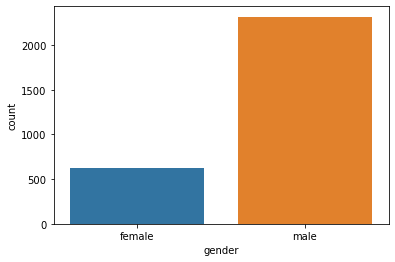

In [33]:
sns.countplot(data=df_corpus_gendered, x="gender")

<AxesSubplot:xlabel='gender', ylabel='count'>

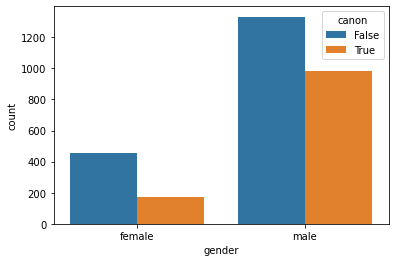

In [34]:
sns.countplot(data=df_corpus_gendered, x="gender", hue="canon")

In [26]:
pb = df_corpus[(df_corpus['gender']== '')|(df_corpus['gender']== 'unknown')|(df_corpus['gender']== '?')]

In [27]:
pb.to_csv(r'../meta_data/unknown.csv', index = False, header=True)

### For AUDE LEBLOND

### get annee de mort de l auteur.

In [29]:
df_corpus

,doc_name,date,auteur,titre,canon,gender,mort_auteur
0,1861_Segur-comtesse-de_Pauvre-Blaise,1861,Segur-comtesse-de,Pauvre-Blaise,False,female,1874
0,1845_Sand-George_Teverino,1845,Sand-George,Teverino,True,female,1876
0,1892_Allais-Alphonse_Vive-la-vie,1892,Allais-Alphonse,Vive-la-vie,False,male,1905
0,1997_Bergounioux-Pierre_La-ligne,1997,Bergounioux-Pierre,La-ligne,True,male,20--
0,1894_Rachilde_Le-Demon-de-l-Absurde,1894,Rachilde,Le-Demon-de-l-Absurde,False,female,1953
...,...,...,...,...,...,...,...
0,1960_Simenon-Georges_Maigret-et-les-vieillards,1960,Simenon-Georges,Maigret-et-les-vieillards,True,male,1989
0,1910_Zevaco-Michel_Triboulet,1910,Zevaco-Michel,Triboulet,False,male,1918
0,1880_Gouraud-Julie_Aller-et-retour,1880,Gouraud-Julie,Aller-et-retour,False,female,1891
0,1956_Sagan-Françoise_Un-certain-sourire,1956,Sagan-Françoise,Un-certain-sourire,False,female,2004


In [34]:
import re

In [46]:
def get_no_date(list_date):
    not_date = []
    for e in list_date:
        if not (re.match('[0-9]{4}',e)):
            not_date.append(e)

    return set(not_date)

In [47]:
set_no_date = get_no_date(df_corpus.mort_auteur)

In [55]:
corpus_ko = df_corpus[df_corpus['mort_auteur'].isin(set_no_date)]

In [91]:
corpus_ko = corpus_ko.sort_values(by='date')

In [92]:
corpus_ko.to_csv(r'corpus_KO.csv', index = False, header=True)

In [105]:
len(corpus_ko)

505

In [52]:
corpus_ok = df_corpus[~df_corpus['mort_auteur'].isin(set_no_date)]

In [60]:
list_date_int = [int(elem) for elem in corpus_ok['mort_auteur']]

In [61]:
corpus_ok['mort_auteur'] = list_date_int

/tmp/ipykernel_100042/2770118539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_ok['mort_auteur'] = list_date_int


In [87]:
corpus_ferme = corpus_ok[corpus_ok['mort_auteur'] > 1952]

In [93]:
corpus_ferme = corpus_ferme.sort_values(by='date')

In [94]:
corpus_ferme.to_csv(r'corpus_OK_sous_droit.csv', index = False, header=True)

In [106]:
len(corpus_ferme)

527

In [62]:
corpus_ouvert = corpus_ok[corpus_ok['mort_auteur'] <= 1952]

In [95]:
corpus_ouvert = corpus_ouvert.sort_values(by='date')

In [96]:
corpus_ouvert.to_csv(r'corpus_OK_libre.csv', index = False, header=True)

In [104]:
len(corpus_ouvert)

1928

In [67]:
import os
import shutil

In [65]:
os.getcwd()

'/home/crazyjeannot/Documents/Doctorat/literary_gender_trouble-main'

In [68]:
src_path = r'/home/crazyjeannot/Documents/master/M2/master_thesis/corpus_chapitres/'
dst_path = r'/home/crazyjeannot/Documents/Doctorat/corpus_chapitre_libre/'

In [100]:
src_path = r'/home/crazyjeannot/Documents/master/M2/master_thesis/corpus_chapitres/'
dst_path = r'/home/crazyjeannot/Documents/Doctorat/corpus_chapitres_sous_droit/'

In [ ]:
src_path = r'/home/crazyjeannot/Documents/master/M2/master_thesis/corpus_chapitres/'
dst_path = r'/home/crazyjeannot/Documents/Doctorat/corpus_chapitres_date_unknown/'

In [101]:
def copy_past_chapitres(src_path, dst_path, corpus_ouvert):
    for file_name in os.listdir(src_path):
        doc_name = path.splitext(path.basename(file_name))[0]
        if doc_name in list(corpus_ouvert.doc_name):
            print(doc_name)
            source = src_path + file_name
            destination = dst_path + file_name
            if os.path.isfile(source):
                shutil.copy(source, destination)
    return

In [103]:
copy_past_chapitres(src_path, dst_path, corpus_ko)

1997_Bergounioux-Pierre_La-ligne
2004_Gavalda-Anna_Ensemble-c-est-tout
2008_Rolin-Olivier_Un-chasseur-de-lions
2015_Musso-Guillaume_L-instant-present
1972_Modiano-Patrick_Les-boulevards-de-ceinture
1883_Dupuit-Albert_Pauline-Tardivau-etude-de-la-vie-de-province
1992_Nothomb-Amelie_Hygiene-de-l-assassin
1861_Rocca-Maria-della_Le-Roman-d-une-femme-laide
2001_Vargas-Fred_Pars-vite-et-reviens-tard
2016_Murail-Marie-Aude_Sauveur-Fils_2
2014_Rolin-Jean_Les-evenements
2001_Gaude-Laurent_Cris
1882_Lacroix-Auguste_La-Famille-Robert
1826_Ginouvier-J-F-T._Gustave-et-Aspais-ou-Les-victimes-des-prejuges-de-l-epoque_tome-1
2010_Lemaitre-Pierre_Cadres-Noirs
1994_Grange-Jean-Christophe_Le-vol-des-cigognes
1997_Ernaux-Annie_La-honte
2008_Nothomb-Amelie_Ni-d-Eve-ni-d-Adam
1876_Glady-Alberic_Male-et-femelle
2006_Bergounioux-Pierre_La-fin-du-monde-en-avançant
2013_Toussaint-Jean-Philippe_Nue
1861_Villars-Fanny_Marie-et-Marguerite-histoire-du-XIIIe-siecle
2014_Mathieu-Nicolas_Aux-animaux-la-guerre
2011_Mil